# Importation des bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import string
import json
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Preparation

In [ ]:
# Load the JSON file
with open('train.json', 'r') as f:
    data = f.readlines()

# Parse each line as JSON and create a list of dictionaries
rows = []
for line in data:
    d = json.loads(line)
    for i, token in enumerate(d['tokens']):
        row = {'Word': token, 'Tag': d['tags'][i]}
        rows.append(row)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(rows)


In [ ]:
df

,Word,Tag
0,can,0
1,you,0
2,find,0
3,me,0
4,the,0
...,...,...
63264,you,0
63265,look,0
63266,for,0
63267,a,0


In [ ]:
label = []
with open('label.json', 'r') as f:
    for line in f:
        label.append(json.loads(line))

tag_to_entity = label[0]
tag_to_entity


{'O': 0,
 'B-Rating': 1,
 'I-Rating': 2,
 'B-Amenity': 3,
 'I-Amenity': 4,
 'B-Location': 5,
 'I-Location': 6,
 'B-Restaurant_Name': 7,
 'I-Restaurant_Name': 8,
 'B-Price': 9,
 'B-Hours': 10,
 'I-Hours': 11,
 'B-Dish': 12,
 'I-Dish': 13,
 'B-Cuisine': 14,
 'I-Price': 15,
 'I-Cuisine': 16}

In [ ]:
# Load the JSON file
with open('test.json', 'r') as f:
    data = f.readlines()

# Parse each line as JSON and create a list of dictionaries
rows = []
for line in data:
    d = json.loads(line)
    for i, token in enumerate(d['tokens']):
        row = {'Word': token, 'Tag': d['tags'][i]}
        rows.append(row)

# Create a DataFrame from the list of dictionaries
df_test = pd.DataFrame(rows)
df_test

,Word,Tag
0,a,0
1,four,1
2,star,2
3,restaurant,0
4,with,5
...,...,...
14251,me,0
14252,with,0
14253,some,0
14254,onion,12


# Vectorization and Training and Evaluating

In [ ]:
# The code uses a TfidfVectorizer to transform the training data (df['Word']) into feature vectors (X_train) and gets the corresponding labels (y_train). 
# It also transforms the testing data (df_test['Word']) into feature vectors (X_test) and gets the corresponding labels (y_test).

# The code trains a random forest classifier (clf) on the training data (X_train, y_train).

# The code predicts the labels for the testing data using the trained classifier (clf.predict(X_test)) and evaluates the model's performance using classification_report. 
# It calculates the confusion matrix (cm) and visualizes it using a heatmap.

In [ ]:
# Create a CountVectorizer or TfidfVectorizer object
vectorizer = TfidfVectorizer()  

# Transform the training data into feature vectors
X_train = vectorizer.fit_transform(df['Word'])

# Get the corresponding labels for the training data
y_train = df['Tag']

# Train a random forest model on the training data
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, y_train)

# Transform the testing data into feature vectors
X_test = vectorizer.transform(df_test['Word'])

# Get the corresponding labels for the testing data
y_test = df_test['Tag']

# Evaluate the model on the testing data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8659
           1       0.66      0.79      0.72       201
           2       0.80      0.60      0.68       125
           3       0.67      0.59      0.63       533
           4       0.59      0.52      0.55       524
           5       0.86      0.70      0.77       812
           6       0.72      0.57      0.64       788
           7       0.81      0.57      0.67       402
           8       0.82      0.38      0.51       392
           9       0.69      0.71      0.70       171
          10       0.60      0.73      0.66       212
          11       0.65      0.46      0.54       295
          12       0.55      0.58      0.57       288
          13       0.46      0.39      0.42       121
          14       0.78      0.75      0.77       532
          15       0.53      0.15      0.24        66
          16       0.56      0.18      0.27       135

    accuracy              

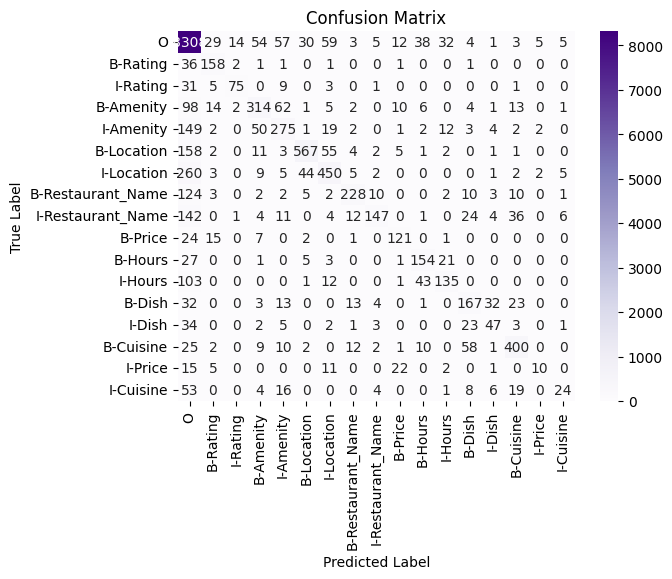

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the classes of your data
classes = {"O": 0, "B-Rating": 1, "I-Rating": 2, "B-Amenity": 3, "I-Amenity": 4, "B-Location": 5, "I-Location": 6,
           "B-Restaurant_Name": 7, "I-Restaurant_Name": 8, "B-Price": 9, "B-Hours": 10, "I-Hours": 11,
           "B-Dish": 12, "I-Dish": 13, "B-Cuisine": 14, "I-Price": 15, "I-Cuisine": 16}

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=classes, yticklabels=classes)

# Set the title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Display the plot
plt.show()

# Saving the Model

In [ ]:
import joblib
joblib.dump((clf, vectorizer), 'mit_restaurant2.pkl')


['mit_restaurant2.pkl']

# Prediction Functions

In [ ]:
def predict_tags(text):
    # Tokenize the input text
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Transform the tokens into feature vectors using the CountVectorizer or TfidfVectorizer
    X = vectorizer.transform(tokens)

    # Predict the output tags using the trained model
    y_pred = clf.predict(X)

    # Zip the tokens and predicted tags together into a list of tuples
    results = list(zip(tokens, y_pred))

    return results

In [ ]:
text = "Can you please tell me where i can find the nearest italian restaurant."
predicted_tags = predict_tags(text)

for word, tag in predicted_tags:
    print(f"{word}: {tag}")

Can: 0
you: 0
please: 0
tell: 0
me: 0
where: 0
i: 0
can: 0
find: 0
the: 0
nearest: 5
italian: 14
restaurant: 0


In [ ]:
def predict_labels(text):
    # Tokenize the input text
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Transform the tokens into feature vectors using the CountVectorizer or TfidfVectorizer
    X = vectorizer.transform(tokens)

    # Predict the output tags using the trained model
    y_pred = clf.predict(X)

    # Map the predicted tags to their corresponding labels using the tag_to_entity dictionary
    labels = []
    for tag in y_pred:
        if tag in tag_to_entity.values():
            label = [k for k, v in tag_to_entity.items() if v == tag][0]
        else:
            label = 'O'
        labels.append(label)

    # Zip the tokens and predicted labels together into a list of tuples
    results = list(zip(tokens, labels))

    return results


# Text Prediction

In [ ]:
text = "Can you please tell me where i can find the nearest italian restaurant."
predicted_labels = predict_labels(text)

for word, label in predicted_labels:
    print(f"{word}: {label}")


Can: O
you: O
please: O
tell: O
me: O
where: O
i: O
can: O
find: O
the: O
nearest: B-Location
italian: B-Cuisine
restaurant: O


In [ ]:
text = "are there any cheap cuban restaurants nearby"
predicted_tags = predict_tags(text)
for word, tag in predicted_tags:
    print(f"{word}: {tag}")
print("------------------------------")
predicted_labels = predict_labels(text)
for word, label in predicted_labels:
    print(f"{word}: {label}")

are: 0
there: 0
any: 0
cheap: 9
cuban: 14
restaurants: 0
nearby: 5
------------------------------
are: O
there: O
any: O
cheap: B-Price
cuban: B-Cuisine
restaurants: O
nearby: B-Location


In [ ]:
# il existe autre technique pour réaliser une tâche de la NER comme :

# Modèles de langue pré-entraînés : Des modèles de langue pré-entraînés tels que BERT, GPT, ELMO, XLNet et SpaCy ont montré de bonnes performances dans la NE
# Réseaux de neurones récurrents (RNN) : Les RNN, tels que les réseaux de neurones LSTM (Long Short-Term Memory) et GRU (Gated Recurrent Unit)

# Cependant, nous n'avons pas étudier ces techniques dans notre cours, nous avons utilisé juste le biblio NLTK